# Fussing with Koestner data

In [1]:
# imports
import os
from pkg_resources import resource_filename

import numpy as np 
import pandas

import seaborn as sns
from matplotlib import pyplot as plt

from oceancolor.polarize import load_data

# Development

## Load

In [2]:
file_2021 = os.path.join(resource_filename('oceancolor', 'data'), 'polarization',
                         'Koestner-et-al-2021_AO_VSFs.xlsx')

In [3]:
k2021 = pandas.read_excel(file_2021, sheet_name=None)

In [4]:
type(k2021)

dict

In [5]:
k2021.keys()

dict_keys(['Header', 'Lagoon', 'Minerals', 'Beaufort Sea - uncorrected', 'Beaufort Sea - corrected'])

## Inspect

In [6]:
k2021['Lagoon']

,Unnamed: 0,DF,cp,bp,psi [deg],0.0835672279422598,0.0986149963388654,0.116372360352576,0.137327211847728,0.162055283268576,...,146,147,148,149,150,151,152,153,154,155
0,D1,10.000000,0.864469,0.519050,VSF,3854.486643,471.231643,320.400826,238.069404,189.937964,...,0.001652,0.001656,0.001661,0.001673,0.001690,0.001680,0.001669,0.001661,0.001541,0.001427
1,D2,5.000000,1.664396,1.079682,VSF,4071.868969,421.098896,334.024962,240.319114,266.436003,...,0.003644,0.003662,0.003687,0.003723,0.003762,0.003778,0.003818,0.003627,0.003405,0.003163
2,D3,2.500000,3.188510,2.233466,VSF,4864.553904,516.288611,467.208488,325.908436,443.013777,...,0.007839,0.007857,0.007855,0.007833,0.007797,0.007842,0.007803,0.007506,0.007115,0.006749
3,D4,1.681818,4.418871,3.458363,VSF,4506.665870,594.217607,568.291285,478.260934,529.745295,...,0.012305,0.012314,0.012328,0.012338,0.012344,0.012419,0.012379,0.011866,0.011365,0.010615
4,D5,1.000000,7.449091,6.997051,VSF,3046.452909,938.691231,881.460326,858.135735,889.976728,...,0.026307,0.026435,0.026605,0.026824,0.027066,0.027067,0.027005,0.026084,0.025011,0.023467


In [7]:
k2021['Lagoon'].keys()

Index([      'Unnamed: 0',               'DF',               'cp',
                     'bp',        'psi [deg]', 0.0835672279422598,
       0.0986149963388654,  0.116372360352576,  0.137327211847728,
        0.162055283268576,
       ...
                      146,                147,                148,
                      149,                150,                151,
                      152,                153,                154,
                      155],
      dtype='object', length=178)

## Plot something

### Slurp $\psi$

In [8]:
psis = []
psi_cols = []
cols = []
for key in k2021['Lagoon'].keys():
    try:
        psis.append(float(key))
    except:
        pass
    else:
        psi_cols.append(key)
        cols.append(k2021['Lagoon'][key])
                    
# Recast
psis = np.array(psis)
psi_data = np.concatenate(cols).reshape(len(psi_cols),(len(k2021['Lagoon'])))

In [9]:
psis[0:5], psi_cols[0:5]

(array([0.08356723, 0.098615  , 0.11637236, 0.13732721, 0.16205528]),
 [0.0835672279422598,
  0.0986149963388654,
  0.116372360352576,
  0.137327211847728,
  0.162055283268576])

In [10]:
psi_data.shape, psis.size

((173, 5), 173)

In [11]:
cols[0]

0    3854.486643
1    4071.868969
2    4864.553904
3    4506.665870
4    3046.452909
Name: 0.0835672279422598, dtype: float64

In [12]:
psi_data[0,:]

array([3854.48664325, 4071.86896927, 4864.55390413, 4506.66587034,
       3046.45290906])

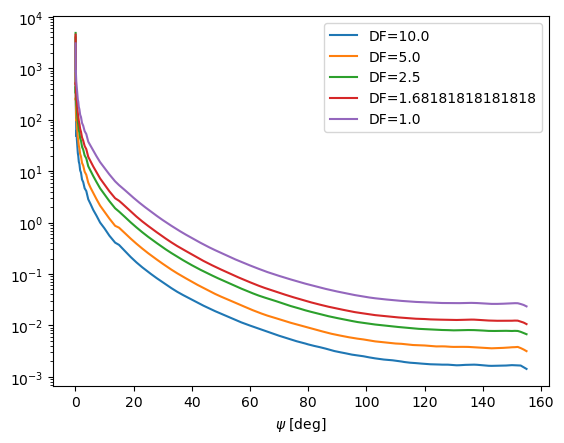

In [42]:
# D1, D2
idxs = [0,1,2,3,4]
plt.clf()
ax = plt.gca()
for idx in idxs:
    ax.plot(psis, psi_data[:,idx], label=f"DF={k2021['Lagoon'].iloc[idx].DF}")
#
# Axes
ax.set_xlabel(r'$\psi$ [deg]')
#ax.set_xlim(10, 155.)
ax.set_yscale('log')
ax.legend()
plt.show()

----

# Polished

## Lagoon

In [13]:
df_lagoon, psis_lagoon, vsf_lagoon = load_data.koetner2021(sheet='Lagoon')

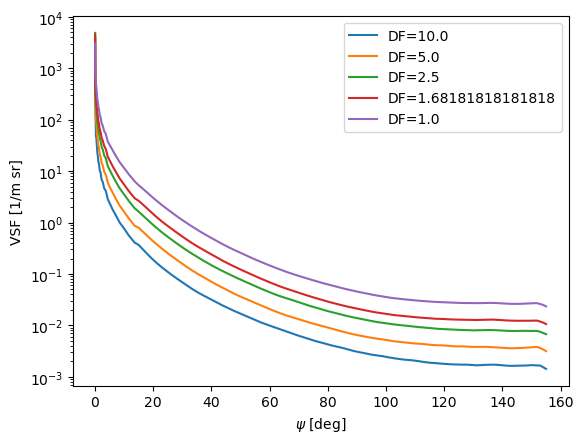

In [15]:
# D1, D2
idxs = range(len(df_lagoon))
plt.clf()
ax = plt.gca()
for idx in idxs:
    ax.plot(psis, vsf_lagoon[:,idx], label=f"DF={df_lagoon.iloc[idx].DF}")
#
# Axes
ax.set_xlabel(r'$\psi$ [deg]')
ax.set_ylabel('VSF [1/m sr]')
#ax.set_xlim(10, 155.)
ax.set_yscale('log')
ax.legend()
plt.show()

## Baufort Sea

In [16]:
df_bs, psis_bs, vsf_bs = load_data.koetner2021(sheet='BS')

In [18]:
i110 = np.argmin(np.abs(psis_bs-110.))
i18 = np.argmin(np.abs(psis_bs-18.))

In [19]:
vsf_bs[i110,:]

array([0.00172557, 0.00464782, 0.00543084, 0.03512455, 0.03113935,
       0.0076046 , 0.02912554, 0.02148508, 0.03412124, 0.0105694 ,
       0.01555953, 0.04918477, 0.0436235 , 0.07717567, 0.00278972,
       0.00251215, 0.09212144, 0.00036157, 0.00384177, 0.00315625,
       0.0306061 , 0.02150036,        nan, 0.0070496 , 0.01831834,
       0.01233986, 0.04988567, 0.00653276, 0.01178088, 0.0056824 ,
       0.00599291, 0.14233421, 0.00742714, 0.03194327,        nan,
       0.00110015])

### Scatter plot of $b_p$ vs. $VSF_{110}/VSF_{18}$

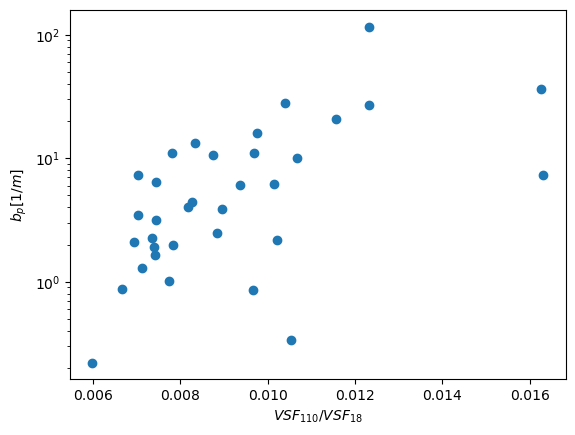

In [23]:
plt.clf()
ax = plt.gca()

ax.scatter(vsf_bs[i110,:]/vsf_bs[i18,:], df_bs.bp)
# Axes
ax.set_ylabel(r'$b_p [1/m]$')
ax.set_xlabel(r'$VSF_{110}/VSF_{18}$')
#ax.set_xlim(10, 155.)
ax.set_yscale('log')
#ax.legend()
plt.show()